CS 418 Final Project
---
Using dataset scraped from Zillow
Includes all houses for sale in Chicago

data.csv is broken down into these columns...

| Address | Zip Code | Value | SQFT | Price Per SQFT | Number of Bedrooms | Number of Bathrooms | Number of Full Bathrooms | Year Built | Heating | Cooling | Parking | Type | Has Garage | Number of Storeis | HOA FEE |
|---------|----------|-------|------|----------------|--------------------|---------------------|--------------------------|------------|---------|---------|---------|------|------------|-------------------|---------|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import math
import operator
%matplotlib inline

dfhouses = pd.read_csv('data.csv')

dfhouses.head()

,Address,Zip Code,Value,SQFT,Price Per SQFT,Number of Bedrooms,Number of Bathrooms,Number of Full Bathrooms,Year Built,Heating,Cooling,Parking,Type,Has Garage,Number of Stories,HOA Fee
0,4800 S Lake Park Ave APT 607,60615,35000.0,1175.0,30.0,2.0,1.0,1.0,1970.0,Forced air: Gas,Central,None,Condo,No,9.0,1177.0
1,232 N La Crosse Ave,60644,239900.0,2300.0,104.0,5.0,3.0,3.0,1885.0,Forced air: Gas,Central,Garage - Detached: Covered,Single Family,NaN,NaN,NaN
2,12043 S Wallace St,60628,7000.0,1970.0,4.0,7.0,3.0,3.0,1898.0,Gas,NaN,None,Multiple Occupancy,No,3.0,NaN
3,1511 S Kolin Ave #2,60623,55900.0,NaN,NaN,3.0,2.0,2.0,2006.0,Gas,Central,Covered,Condo,NaN,1.0,NaN
4,4938 S Drexel Blvd APT 114R,60615,209000.0,1218.0,172.0,2.0,2.0,1.0,1891.0,Forced air: Gas,Central,Garage: Covered,Condo,NaN,2.0,377.0


Best Zip Code for Price Per SQFT
---
Compares all the Price Per SQFT for each zip code

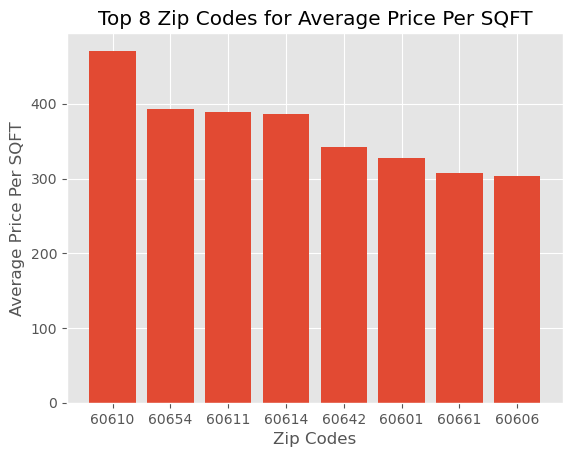

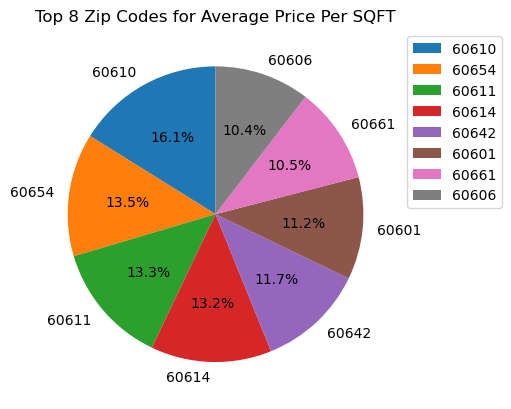

In [100]:
# Grab the zip code and price per sqft columns
df_zip_price_per_sqft = dfhouses.loc[:, ['Zip Code','Price Per SQFT']]

# Sort by ASC for price per sqft
df_zip_price_per_sqft = df_zip_price_per_sqft.sort_values(by = 'Price Per SQFT')

# Make a dictionary for each zip code and add to the total price per sqft
zip_dict = {}
zip_dict_count = {}

for i, row in df_zip_price_per_sqft.iterrows():
    (zip_code, price_per_sqft) = row
    if math.isnan(price_per_sqft):
        continue;
        
    
    # See if zip_code is in dictionary, add its price_per_sqft
    # Check for nans
    if zip_code in zip_dict:
        zip_dict[zip_code] += price_per_sqft
        zip_dict_count[zip_code] += 1
    else:
        zip_dict[zip_code] = price_per_sqft
        zip_dict_count[zip_code] = 1

# Make a new dictionary with the average values of Price Per SQFT
zip_dict_avg = {}

for key, val in zip_dict.items():
    zip_dict_avg[key] = int(val / zip_dict_count[key])
        
# Sort the dictionary
zip_dict_avg = dict(sorted(zip_dict_avg.items(), key=operator.itemgetter(1), reverse=True))
x_vals = np.array(list(zip_dict_avg.keys()), dtype="int")[:8]
y_vals = np.array(list(zip_dict_avg.values()), dtype="int")[:8]

# Plot the bar graph for the top 8
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Zip Codes')
plt.ylabel('Average Price Per SQFT')
plt.title('Top 8 Zip Codes for Average Price Per SQFT')

# Plot the pie graph for the top 8
style.use('default')
fig1, ax1 = plt.subplots()
pie = ax1.pie(y_vals, labels=x_vals, autopct='%1.1f%%', shadow=False, startangle=90)
plt.legend(pie[0], x_vals, bbox_to_anchor = (1,1))
plt.title('Top 8 Zip Codes for Average Price Per SQFT')
plt.show()

## Best Zip Code for Rooms

Finds which zip code is more likely to have more rooms

Text(0.5, 1.0, 'Top 10 Zip Codes with the Most Amount of Rooms')

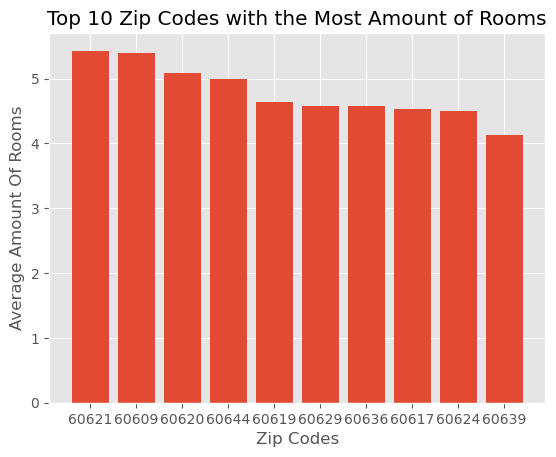

In [16]:
zip_code_average = dfhouses.groupby('Zip Code')['Number of Bedrooms'].mean()

zip_code_average = zip_code_average.sort_values(ascending = False)

x_vals = list(zip_code_average.index.values)[:10]
y_vals = zip_code_average.to_list()[:10]

# Plot the bar graph for the top 10
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Zip Codes')
plt.ylabel('Average Amount Of Rooms')
plt.title('Top 10 Zip Codes with the Most Amount of Rooms')

## Highest and Lowest Valued Properties

Finds the highest valued property in the Chicago and the lowest valued property in Chicago

In [4]:
most_expensive_house = dfhouses.groupby('Zip Code')['Value'].max().sort_values(ascending=False)
cheapest_house = dfhouses.groupby('Zip Code')['Value'].min().sort_values(ascending=True)

print(most_expensive_house.head(1))
print(cheapest_house.head(1))

Zip Code
60610    18750000.0
Name: Value, dtype: float64
Zip Code
60628    7000.0
Name: Value, dtype: float64


## Average Price of Properties by Zip Code

These prices are not a representation of the average income of the zip code but an average value of the properties for sale at the zip code. One can only make assumptions of the income based on the average property value; however, one can say that zip code 60610 is currently the most expensive to buy in and 60633 is the cheapest.

Text(0.5, 1.0, 'Top 10 Zip Codes with Best Average Price')

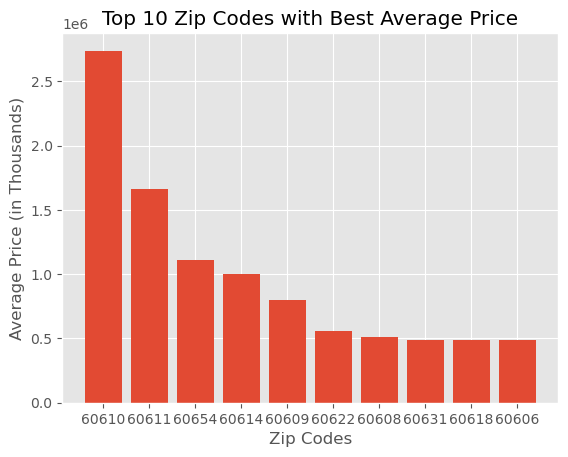

In [20]:
# prevents pandas from displaying floats in scientific notation
pd.options.display.float_format = '{:.2f}'.format

average_price_by_zip = dfhouses.groupby('Zip Code')['Value'].mean().sort_values(ascending=False)
x_vals = list(average_price_by_zip.index.values)[:10]
y_vals = average_price_by_zip.to_list()[:10]

# Plot the bar graph for the top 10
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Zip Codes')
plt.ylabel('Average Price (in Thousands)')
plt.title('Top 10 Zip Codes with Best Average Price')

## Perfoming a Comparable Market Analysis (CMA) on Each Zip Code

Doing a CMA on each zip code can help us analyze whether you're over paying for a property or buying something at a steal.

In [6]:
cma_results = dfhouses[['Address','Zip Code','Value','SQFT','Price Per SQFT']]

# first we start by calculating average price per SQFT of each zipcode
average_ppsqft = cma_results.groupby('Zip Code')['Price Per SQFT'].mean()

# after calculating the average price per SQFT for each zip, then we can approximate how much a
# property should be based on this average
approximate_values = []

# multiplies each property's SQFT by the average ppsqft of its zip code to get
# the approximate value/price
for index, row in cma_results.iterrows():
    approximated_value = row['SQFT'] * average_ppsqft[row['Zip Code']]
    approximate_values.append(approximated_value)

# adds the results to the dataframe
cma_results.insert(len(cma_results.columns), "Approximate Value", approximate_values) 

# after finding the approximate value of each property, we can assess whether you are
# over-paying or under-paying for a property. A negative price signifies under-paying a
# plus sign signifies over-paying
overunder_values = []

# calculating the over under value is simple... we are just taking the difference between 
# the listed value and the approximated value
for index, row in cma_results.iterrows():
    overunder = row['Value'] - row['Approximate Value']
    overunder_values.append(overunder)

cma_results.insert(len(cma_results.columns), "Over/Under Value", overunder_values)

cma_results

,Address,Zip Code,Value,SQFT,Price Per SQFT,Approximate Value,Over/Under Value
0,4800 S Lake Park Ave APT 607,60615,35000.00,1175.00,30.00,168025.00,-133025.00
1,232 N La Crosse Ave,60644,239900.00,2300.00,104.00,219880.00,20020.00
2,12043 S Wallace St,60628,7000.00,1970.00,4.00,164354.29,-157354.29
3,1511 S Kolin Ave #2,60623,55900.00,nan,nan,nan,nan
4,4938 S Drexel Blvd APT 114R,60615,209000.00,1218.00,172.00,174174.00,34826.00
...,...,...,...,...,...,...,...
792,4816 N Nordica Ave,60656,389000.00,1265.00,308.00,268654.38,120345.62
793,919 W Wolfram St,60657,899000.00,3934.00,229.00,1028156.22,-129156.22
794,444 W Fullerton Pkwy APT 1503,60614,330000.00,1175.00,281.00,454680.66,-124680.66
795,10235 S Whipple St,60655,235000.00,1027.00,229.00,178954.75,56045.25


Top 10 Lowest HOA Fee per Address
---
Use Address and HOA Fee columns

Text(0.5, 1.0, 'Top 10 Addresses with lowest HOA Fee')

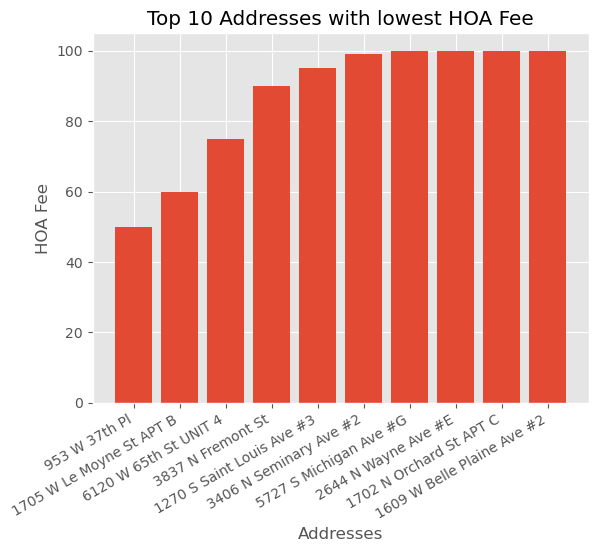

In [36]:
# Grab the address and hoa fee columns
df_hoa_fee = dfhouses.loc[:, ['Address','HOA Fee']]

# Sort by ASC for hoa fee
df_hoa_fee_low = df_hoa_fee.sort_values(by = 'HOA Fee')

# Grab x and y vals
x_vals = df_hoa_fee_low.loc[:, 'Address'][:10]

y_vals = df_hoa_fee_low.loc[:, 'HOA Fee'][:10]

style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Addresses')
plt.ylabel('HOA Fee')
plt.xticks(rotation=30, ha='right')
plt.title('Top 10 Addresses with lowest HOA Fee')

Top 10 Address with Most Amount of Bedrooms and Bathrooms
---
Use Address, Bedrooms, and Bathrooms

Text(0.5, 1.0, 'Top 10 Addresses with The Highest Amount Of Rooms')

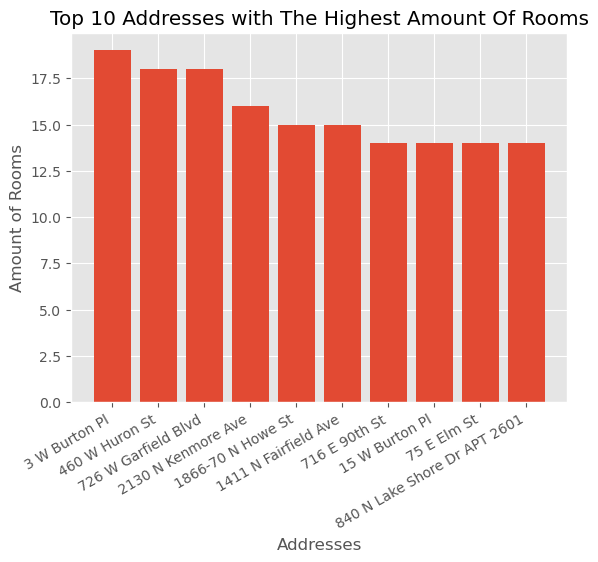

In [53]:
# Grab the address and hoa fee columns
df_total_room = dfhouses.loc[:, ['Address','Number of Bedrooms', 'Number of Bathrooms']]

# Combine the two columns
df_total_room['Total'] = df_total_room['Number of Bedrooms'] + df_total_room['Number of Bathrooms']

# Sort by DESC
df_total_room.sort_values(by=['Total'], axis=0, ascending=False, inplace=True)

x_vals = df_total_room.loc[:, 'Address'][:10]
y_vals = df_total_room.loc[:, 'Total'][:10]

style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Addresses')
plt.ylabel('Amount of Rooms')
plt.xticks(rotation=30, ha='right')
plt.title('Top 10 Addresses with The Highest Amount Of Rooms')

Top 10 Address with Lowest Price and Newest Year Built
---
Use Address, Value, Year Built

Text(0.5, 1.0, 'Top 10 Zip Codes with Lowest Price and Newest Year Built')

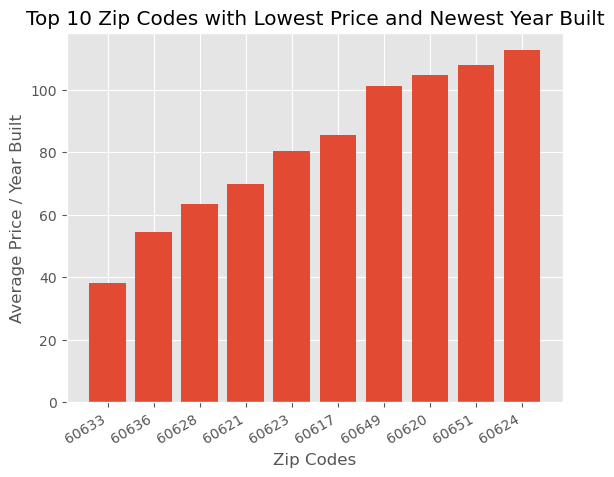

In [91]:
# Grab the columns we need for the analysis
df_price_year = dfhouses.loc[:, ['Zip Code', 'Value', 'Year Built']]

# Sort by Value ASC and Year Built DESC
#df_price_year = df_price_year.sort_values(by=['Value', 'Year Built'], ascending=[True, False])
df_price_year['Value/Year'] = df_price_year.loc[:, 'Value']/df_price_year.loc[:, 'Year Built']
#df_price_year.head()

# Group by Zip Code
average_price_year = df_price_year.groupby('Zip Code')['Value/Year'].mean().sort_values(ascending=True)

# Get x and y vals
x_vals = list(average_price_year.index.values)[:10]
y_vals = average_price_year.to_list()[:10]

# Plot the bar graph for the top 10
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Zip Codes')
plt.ylabel('Average Price / Year Built')
plt.xticks(rotation=30, ha='right')
plt.title('Top 10 Zip Codes with Lowest Price and Newest Year Built')

Most Common House Types
---
Comparing the most common types of houses

Text(0.5, 1.0, 'Most Common Home Types for Sale')

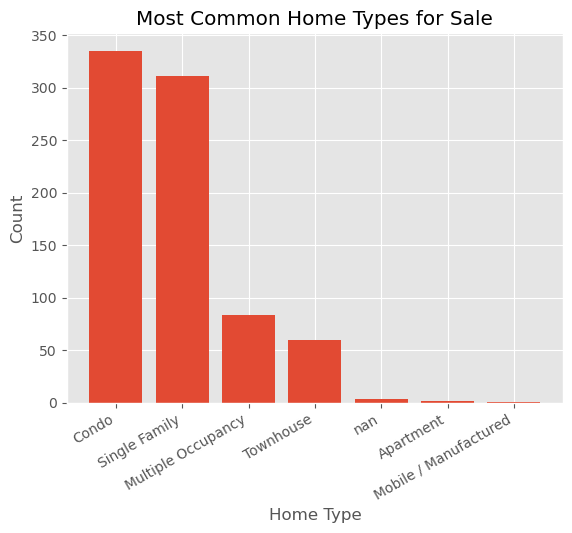

In [93]:
# Types: ['Condo', 'Single Family', 'Multiple Occupancy', 'Townhouse', nan, 'Mobile / Manufactured', 'Apartment']

# Count the total amount of different types
type_count = {}
for i, row in dfhouses.loc[:, ['Type']].iterrows():
    if str(row['Type']) in type_count:
        type_count[str(row['Type'])] += 1
    else:
        type_count[str(row['Type'])] = 1
        
# Sort the type_count dictionary
type_count_sort = dict(sorted(type_count.items(), key=operator.itemgetter(1), reverse=True))
x_vals = np.array(list(type_count_sort.keys()), dtype="object")
y_vals = np.array(list(type_count_sort.values()), dtype="int")

# Plot the bar graph
style.use('ggplot')
plt.bar(np.arange(len(x_vals)), y_vals, align='center')
plt.xticks(np.arange(len(x_vals)), x_vals)
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.title('Most Common Home Types for Sale')

How Many Houses Include Parking
---
Seeing the number of houses that include parking

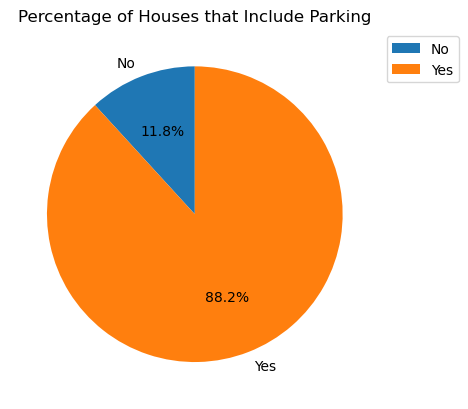

In [99]:

# Make a dictionary to keep count
parking_count = {}
parking_count['No'] = 0
parking_count['Yes'] = 0

# Iterate over every row, check if the row is equal to None
for i, row in dfhouses.loc[:, ['Parking']].iterrows():
    if str(row['Parking']) == "None":
        parking_count['No'] += 1
    else:
        parking_count['Yes'] += 1

# Get the x and y vals
x_vals = np.array(list(parking_count.keys()), dtype="object")
y_vals = np.array(list(parking_count.values()), dtype="int")

# Plot the pie graph for the top 8
style.use('default')
fig1, ax1 = plt.subplots()
pie = ax1.pie(y_vals, labels=x_vals, autopct='%1.1f%%', shadow=False, startangle=90)
plt.legend(pie[0], x_vals, bbox_to_anchor = (1,1))
plt.title('Percentage of Houses that Include Parking')
plt.show()